SCALE=7.62939453125e-05
-2.5 -0.00011349467175608599 -32768 -1
-2.4999237060546875 -0.00011352584665401256 -32767 -1
-2.499847412109375 -0.00011355703000886503 -32766 -1
-2.4997711181640625 -0.00011358822182290137 -32765 -1
-2.49969482421875 -0.00011361942209838017 -32764 -1
-2.4996185302734375 -0.00011365063083756061 -32763 -1
-2.499542236328125 -0.00011368184804270244 -32762 -1
-2.4994659423828125 -0.00011371307371606602 -32761 -1
-2.4993896484375 -0.0001137443078599123 -32760 -1
-2.4993133544921875 -0.0001137755504765028 -32759 -1
-2.499237060546875 -0.00011380680156809966 -32758 -1
-2.4991607666015625 -0.00011383806113696558 -32757 -1
-2.49908447265625 -0.00011386932918536392 -32756 -1
-2.4990081787109375 -0.00011390060571555852 -32755 -1
-2.498931884765625 -0.00011393189072981391 -32754 -1
-2.4988555908203125 -0.00011396318423039513 -32753 -1
-2.498779296875 -0.00011399448621956791 -32752 -1
-2.4987030029296875 -0.00011402579669959853 -32751 -1
-2.498626708984375 -0.00011405711567

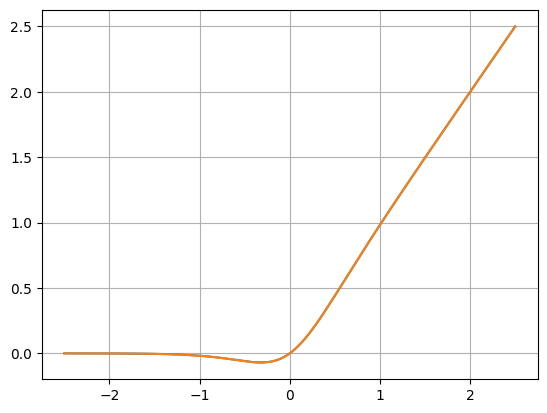

In [2]:
import numpy as np
import matplotlib.pyplot as plt


N_bits = 16
N =  2 ** N_bits
SCALE = 5/(N)
MAX_INT = int((N/2)-1)
MIN_INT = int(-(N/2))

print(f"{SCALE=}")

def fp2intrep(x):    
    if (x < -2.5):
        x_int = int(-N/2)
    elif (x >= 2.5):
        x_int = int(N/2-1)
    else:
        x_int = int(x / SCALE)
    return x_int

def int2fprep(x):    
    x_fp = float(x * SCALE)
    return x_fp

def sigmoid(x):
    return 1 / (1 + np.exp(-x* 4))

LUT = []
for x_int in range (int(-N/2),int(N/2)):
    x_fp = x_int*SCALE
    y_fp = sigmoid(x_fp) * x_fp
    print(x_fp, y_fp, x_int, fp2intrep(y_fp))
    LUT.append(fp2intrep(y_fp))
len(LUT)

def forward(x):
    # Se for escalar (int ou float), tratamos normalmente
    if np.isscalar(x):
        # if x < -2.5:
        #     return 0
        if x >= 2.5:
            return x
        else:
            x_int = fp2intrep(x)
            wsilu = LUT[int(x_int + N / 2)]
            y = wsilu
            return int2fprep(y)

    # Se for array numpy -> aplica a lógica elemento por elemento
    elif isinstance(x, np.ndarray):
        # Vetorizar com np.vectorize para preservar a lógica escalar
        f = np.vectorize(forward)        
        return f(x)

    else:
        raise TypeError("Entrada deve ser número escalar ou numpy.ndarray")


x = np.linspace(-2.5, 2.5, 200)
y_int = forward(x)
y_fp = x * sigmoid(x)


mse = np.mean(np.power((y_int - y_fp), 2))

plt.plot(x, y_int)
plt.plot(x, y_fp)
plt.grid()

print(f"{mse=}")